In [3]:
"""
web Scrapping using BeautifulSoup
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.imdb.com/search/title/?title_type=feature&year=2018-01-01,2018-12-31&start=101&ref_=adv_nxt"


response = requests.request("GET", url)

In [4]:
data= BeautifulSoup(response.text, 'html.parser')
print(data.prettify())
print(data.title)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Feature Film,
Released between 2018-01-01 and 2018-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof 

In [80]:
cards_data = data.find_all('div', attrs={'class': 'lister-item-content'})

for card in cards_data:
    print(card.prettify())

<div class="lister-item-content">
 <h3 class="lister-item-header">
  <span class="lister-item-index unbold text-primary">
   101.
  </span>
  <a href="/title/tt5688932/">
   Sorry to Bother You
  </a>
  <span class="lister-item-year text-muted unbold">
   (2018)
  </span>
 </h3>
 <p class="text-muted">
  <span class="certificate">
   R
  </span>
  <span class="ghost">
   |
  </span>
  <span class="runtime">
   112 min
  </span>
  <span class="ghost">
   |
  </span>
  <span class="genre">
   Comedy, Fantasy, Sci-Fi
  </span>
 </p>
 <div class="ratings-bar">
  <div class="inline-block ratings-imdb-rating" data-value="6.9" name="ir">
   <span class="global-sprite rating-star imdb-rating">
   </span>
   <strong>
    6.9
   </strong>
  </div>
  <div class="inline-block ratings-user-rating">
   <span class="userRatingValue" data-tconst="tt5688932" id="urv_tt5688932">
    <span class="global-sprite rating-star no-rating">
    </span>
    <span class="rate" data-no-rating="Rate this" data-valu

In [5]:
cards_data = data.find_all('div', attrs={'class': 'lister-item-content'})

for card in cards_data:
    #nama film
    nama_film = card.find('a').text
   
    #durasi
    duration =card.find('span', attrs={'class' : 'runtime'}).text
    
    
    #votes
    votes = card.find('span', attrs={'name' : 'nv'}).text
    
    #score
    score = card.find('div', attrs={'class' : 'inline-block ratings-imdb-rating'}).strong.text
    
    #rating
    rating = card.find('p', attrs={'class' : 'text-muted'}).span.text
    

    
    print (nama_film, " | ", duration, " | ", votes, " | ",score, "|", rating , " | ", "\n")

Operation Finale  |  122 min  |  30,614  |  6.6 | PG-13  |  

Mid90s  |  85 min  |  46,017  |  7.4 | R  |  

Isle of Dogs  |  101 min  |  134,794  |  7.9 | PG-13  |  

Creed II  |  130 min  |  101,360  |  7.1 | 13+  |  

The Cloverfield Paradox  |  102 min  |  93,599  |  5.5 | PG-13  |  

To All the Boys I've Loved Before  |  99 min  |  83,453  |  7.1 | 99 min  |  

The Clovehitch Killer  |  109 min  |  16,290  |  6.5 | 109 min  |  

Nomis  |  98 min  |  13,434  |  5.9 | R  |  

The House with a Clock in Its Walls  |  105 min  |  43,899  |  6.0 | 13+  |  

The Perfection  |  90 min  |  34,253  |  6.1 | 90 min  |  

Holmes & Watson  |  90 min  |  29,375  |  3.8 | PG-13  |  

White Boy Rick  |  111 min  |  25,326  |  6.4 | R  |  

Leave No Trace  |  109 min  |  48,890  |  7.2 | PG  |  

Boy Erased  |  115 min  |  30,157  |  6.9 | R  |  

Dragged Across Concrete  |  158 min  |  35,075  |  7.0 | 17+  |  

Night School  |  111 min  |  34,010  |  5.6 | PG-13  |  

Roma  |  135 min  |  136,45

In [9]:
scrapped_data= []

for card in cards_data:
    card_details = {}
    
    #nama film
    nama_film = card.find('a').text
   
    #durasi
    duration =card.find('span', attrs={'class' : 'runtime'}).text
    
    
    #votes
    votes = card.find('span', attrs={'name' : 'nv'}).text
    
    #score
    score = card.find('div', attrs={'class' : 'inline-block ratings-imdb-rating'}).strong.text
    
    #rating
    rating = card.find('p', attrs={'class' : 'text-muted'}).span.text
    

    
    print (nama_film, " | ", duration, " | ", votes, " | ",score, "|", rating , " | ", "\n")
    
    card_details["Nama Film"] = nama_film
    card_details["Durasi Film"] = duration
    card_details["Votes Oleh User"] = votes
    card_details["Skor Film"] = float(score)
    card_details["Rating Film"] = rating
    
    
    #default variabel pada PYTHON ADALAH STRING atau str, maka ubah ke int dulu
    
    scrapped_data.append(card_details)
    
df = pd.DataFrame(data = scrapped_data)
df.to_csv("RC_14117026.csv", index=False)

Operation Finale  |  122 min  |  30,614  |  6.6 | PG-13  |  

Mid90s  |  85 min  |  46,017  |  7.4 | R  |  

Isle of Dogs  |  101 min  |  134,794  |  7.9 | PG-13  |  

Creed II  |  130 min  |  101,360  |  7.1 | 13+  |  

The Cloverfield Paradox  |  102 min  |  93,599  |  5.5 | PG-13  |  

To All the Boys I've Loved Before  |  99 min  |  83,453  |  7.1 | 99 min  |  

The Clovehitch Killer  |  109 min  |  16,290  |  6.5 | 109 min  |  

Nomis  |  98 min  |  13,434  |  5.9 | R  |  

The House with a Clock in Its Walls  |  105 min  |  43,899  |  6.0 | 13+  |  

The Perfection  |  90 min  |  34,253  |  6.1 | 90 min  |  

Holmes & Watson  |  90 min  |  29,375  |  3.8 | PG-13  |  

White Boy Rick  |  111 min  |  25,326  |  6.4 | R  |  

Leave No Trace  |  109 min  |  48,890  |  7.2 | PG  |  

Boy Erased  |  115 min  |  30,157  |  6.9 | R  |  

Dragged Across Concrete  |  158 min  |  35,075  |  7.0 | 17+  |  

Night School  |  111 min  |  34,010  |  5.6 | PG-13  |  

Roma  |  135 min  |  136,45

In [10]:
#tampilkan score <= 5.5
pdx = df.loc[(df["Skor Film"] <= 5.5)]

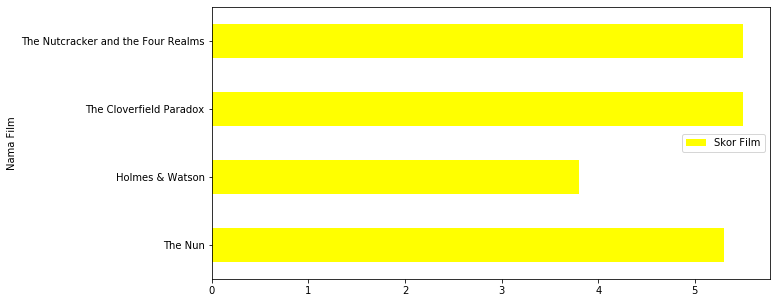

In [156]:
#tampilkan diagram batang
import matplotlib.pyplot as plt
pdx.plot(kind="barh", x="Nama Film", y="Skor Film", figsize=(10,5), color="yellow")
plt.show()

In [11]:
#tampilkan score >= 6.0 hingga 8.0
pdx = df.loc[(df["Skor Film"] >= 6.0) & (df["Skor Film"] <= 8.0) ]

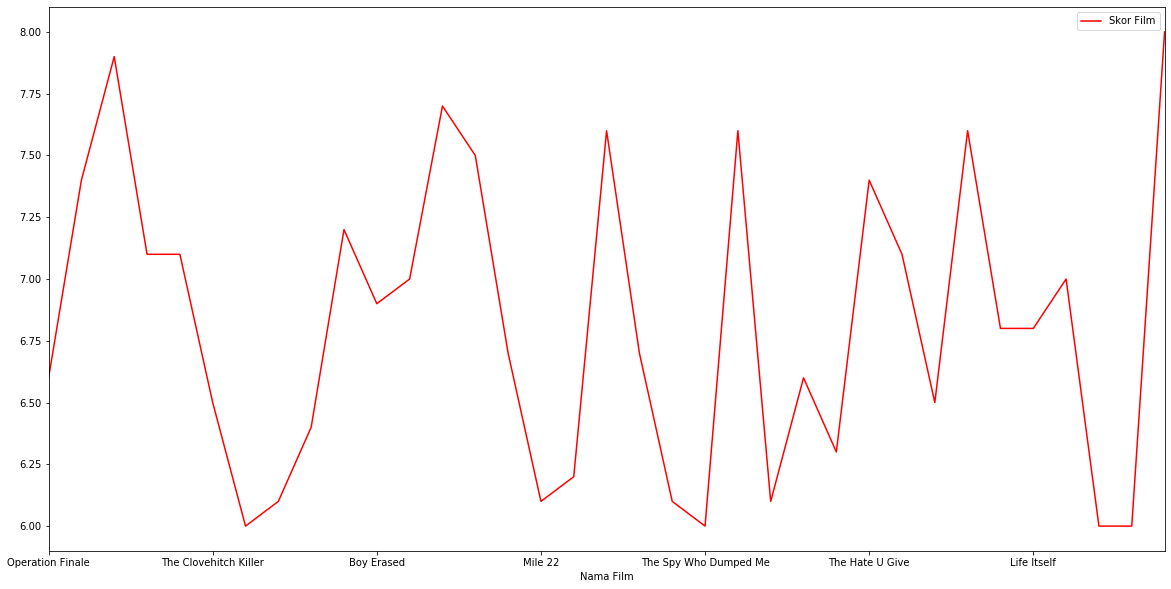

In [12]:
#tampilkan diagram line
import matplotlib.pyplot as plt
pdx.plot(kind="line", x="Nama Film", y="Skor Film", figsize=(20,10), color="red")
plt.show()

In [13]:
#tampilkan selurh film berdasarkan skor
pdx = df.loc[(df["Skor Film"] >= 0.0)]

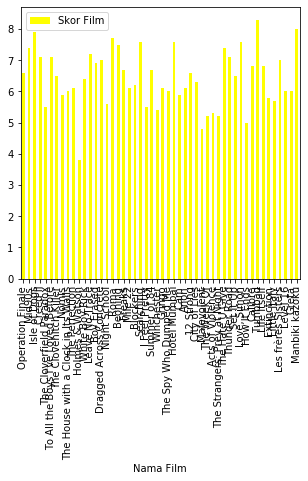

In [14]:
#tampilkan diagram batang tegak
import matplotlib.pyplot as plt
pdx.plot(kind="bar", x="Nama Film", y="Skor Film", figsize=(5,5), color="yellow")
plt.show()